## Progression of selfplay games
Scores are mean log score
* Games 0 to 200: Fixed move order L,U,D,R

In [1]:
import os
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
os.chdir('../selfplay/fixed/')

In [2]:
def get_max(x):
    tiles = []
    for _ in range(16):
        tiles.append(x & 0xF)
        x >>= 4
    return max(tiles)

In [4]:
indices = []
moves = []
scores = []
tiles = []
i = 0
while True:
    try:
        x = np.load('fixed'+str(i).zfill(5)+'.npz')
        indices.append(i)
        moves.append(len(x['boards']))
        scores.append(x['score'])
        tiles.append(get_max(x['boards'][-1].item()))
        i += 1
    except FileNotFoundError:
        print('Got {} games'.format(i))
        break

Got 200 games


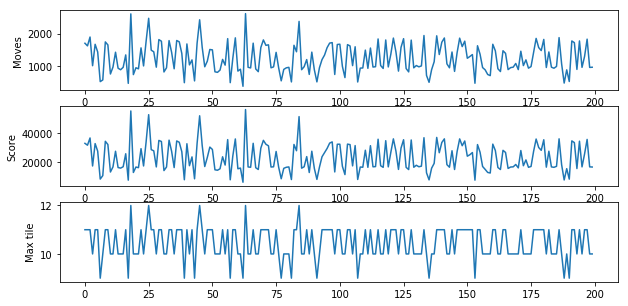

In [7]:
plt.subplots(figsize=(10, 5))
plt.subplot(311)
plt.plot(indices, moves)
plt.ylabel('Moves')
plt.subplot(312)
plt.plot(indices, scores)
plt.ylabel('Score')
plt.subplot(313)
plt.plot(indices, tiles)
plt.ylabel('Max tile')
plt.show()

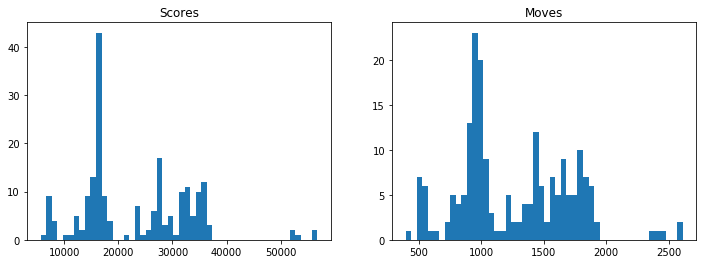

In [30]:
xscore = (min(scores), max(scores))
xmoves = (min(moves), max(moves))
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(scores, range=xscore, bins=50)
plt.title('Scores')
plt.subplot(1,2,2)
plt.hist(moves, range=xmoves, bins=50)
plt.title('Moves')
plt.show()

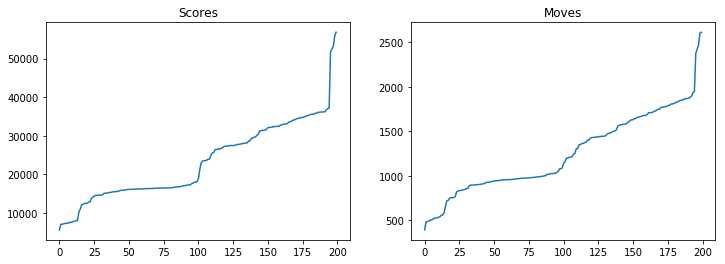

In [31]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(sorted(scores))
plt.title('Scores')
plt.subplot(1,2,2)
plt.plot(sorted(moves))
plt.title('Moves')
plt.show()

In [33]:
blocks = 2

In [34]:
# Test if means are the same
for i in range(blocks-1):
    print(stats.ttest_ind(moves[100*i:100*(i+1)], moves[100*(i+1):100*(i+2)], equal_var=False))

Ttest_indResult(statistic=0.4783628548868373, pvalue=0.6329442382820742)


In [35]:
# Test if variances are the same
for i in range(blocks-1):
    print(stats.bartlett(moves[100*i:100*(i+1)], moves[100*(i+1):100*(i+2)]))

BartlettResult(statistic=4.687531876372689, pvalue=0.030382258304619058)


In [36]:
print(np.vstack([np.mean(np.reshape(moves, (blocks, 100)), axis=1),
                 np.std(np.reshape(moves, (blocks, 100)), axis=1)]))

[[1266.61       1236.24      ]
 [ 492.4715605   395.60806665]]


# Move distribution

In [11]:
moves = []
step = 100
for i in range(0, len(indices)-len(indices)%step, step):
    m = []
    for j in range(i, i+step):
        x = np.load('fixed'+str(j).zfill(5)+'.npz')
        m.extend(np.argsort(x['results'], axis=1)[:, -1])
    moves.append(m)

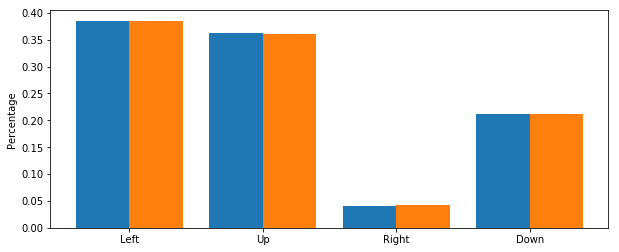

In [44]:
plt.figure(figsize=(10, 4))
plt.hist(moves, np.arange(5)-0.5, density=True)
plt.xticks(np.arange(4), ['Left', 'Up', 'Right', 'Down'])
# plt.legend([str(i) for i in range(0, len(indices), 10)])
plt.ylabel('Percentage')
plt.show()

Placeholder for comment

In [7]:
import pandas as pd
import seaborn as sns

In [15]:
groups = ['Fixed', 'Fixed']
sns_moves = pd.DataFrame(columns=['group','Left','Up','Right','Down'])
for m, g in zip(moves, groups):
    hist = np.histogram(m, bins=np.arange(5))[0]
    hist = hist / hist.sum()
    sns_moves = sns_moves.append({'group': g,
                                  'Left': hist[0],
                                  'Up': hist[1],
                                  'Right': hist[2],
                                  'Down': hist[3]},
                                  ignore_index=True)

In [16]:
sns_moves = pd.melt(sns_moves, id_vars='group', var_name='move', value_name='percent')

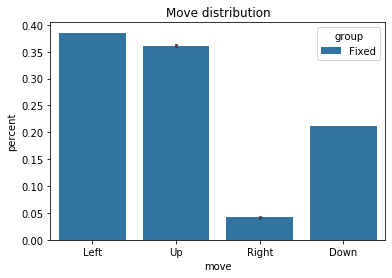

In [18]:
# Note: seaborn error bars are 95% CI of mean
ax = sns.barplot(x='move', y='percent', hue='group', data=sns_moves)
ax.set_title('Move distribution')
plt.show()